$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N° 2 | Grupo 1}$$


Integrantes:
* Marco Aurelio Ramiro Lagones López
* Luis Eduardo Salazar Aguilar

#   Modelo elegido: Regresion

El dataset con el que se trabaja muestra la morbilidad en consulta ambulatoria que corresponde a la relación de los pacientes agrupados por edad y según el diagnóstico de acuerdo con los Problemas Relacionados con la Salud en el Hospital Nacional Arzobispo Loayza (HNAL) y la Clasificación Estadística Internacional de Enfermedades (CIE) (HNAL, 2017).

## Carga de dataset y librerias

Se comienza con la carga de las librerías pertinentes para nuestro trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

A continuación, se lee el dataframe "DIAGNOSTICOS_POR_GRUPOS_DE_EDAD.csv" y se da la separación de datos de acuerdo con el delimitador. Se obtiene un dataframe con 12 etiquetas incluída la indexación.

In [ ]:
df=pd.read_csv('DIAGNOSTICOS_POR_GRUPOS_DE_EDAD.csv',delimiter=';')
print(df.shape)
df

(6049, 12)


,PERIODO_DIAGNOSTICO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 25 A 29 AÑOS,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,MENORES DE 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,MASCULINO,DE 60 A 64 AÑOS,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2
3,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,MASCULINO,DE 65 AÑOS A MÁS,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1
4,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 5 A 9 AÑOS,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6044,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 50 A 54 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,16
6045,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 45 A 49 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,22
6046,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 40 A 44 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,17
6047,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,FEMENINO,DE 35 A 39 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,15


## Análisis exploratorio

A partir de la siguiente línea de código se identifican las etiquetas a excluir por ser datos iguales para todos los casos, que son: "Establecimiento", "Departamento", "Provincia", "Distrito", "Ubigeo" y "Fecha de corte" . Lo que da como resultado un dataframe de tamaño de 5 columnas por 6049.

In [ ]:
#Se crea una copia de los datos de interes en el dataframe df_red
df_red = df[['SEXO', 'GRUPOS_POR_EDAD','DIAGNOSTICOS_CIE','CATEGORIA_DIAGNOSTICO','TOTAL_PACIENTES']].copy()
print(df_red.shape)
df_red

(6049, 5)


,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,FEMENINO,DE 25 A 29 AÑOS,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,FEMENINO,MENORES DE 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,MASCULINO,DE 60 A 64 AÑOS,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2
3,MASCULINO,DE 65 AÑOS A MÁS,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1
4,FEMENINO,DE 5 A 9 AÑOS,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2
...,...,...,...,...,...
6044,FEMENINO,DE 50 A 54 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,16
6045,FEMENINO,DE 45 A 49 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,22
6046,FEMENINO,DE 40 A 44 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,17
6047,FEMENINO,DE 35 A 39 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,15


In [ ]:
df_red['GRUPOS_POR_EDAD'] = df_red['GRUPOS_POR_EDAD'].replace('MENORES DE 1 AÑO', 'DE 0 A 1 AÑO')
df_red

,SEXO,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,FEMENINO,DE 25 A 29 AÑOS,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,FEMENINO,DE 0 A 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,MASCULINO,DE 60 A 64 AÑOS,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2
3,MASCULINO,DE 65 AÑOS A MÁS,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1
4,FEMENINO,DE 5 A 9 AÑOS,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2
...,...,...,...,...,...
6044,FEMENINO,DE 50 A 54 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,16
6045,FEMENINO,DE 45 A 49 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,22
6046,FEMENINO,DE 40 A 44 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,17
6047,FEMENINO,DE 35 A 39 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS,OTROS ESTADOS POSTQUIRÚRGICOS,15


Continuando con el análsis de datos, se muestra la información resumida del dataframe, donde se nota que no existen datos nulos, por lo que no es necesario aplicar una técnica de imputación de datos, además de que no se pueden identificar outliers dado que se está trabajando con variables del tipo cualitativo.

In [ ]:
# Se mostrará la información del dataframe de interés
print(df_red.info())
df_red.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6049 entries, 0 to 6048
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SEXO                   6049 non-null   object
 1   GRUPOS_POR_EDAD        6049 non-null   object
 2   DIAGNOSTICOS_CIE       6049 non-null   object
 3   CATEGORIA_DIAGNOSTICO  6049 non-null   object
 4   TOTAL_PACIENTES        6049 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 236.4+ KB
None


,TOTAL_PACIENTES
count,6049.000000
mean,2.610845
std,6.264612
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,247.000000


Asímsmo se verfica que no existen datos repetidos, donde la siguiente linea de código muestra que no hay repeticiones

In [ ]:
# Ahora debemos revisar si es que existen datos repetidos
df_red.duplicated().sum()

0

Se cuantifica la cantidad de clases por cada característica restante ("SEXO", "GRUPOS_POR_EDAD","DIAGNOSTICOS_CIE" y "CATEGORIA_DIAGNOSTICO"), donde se obtiene que:
* Sexo presenta 2 clases
* En grupos por edad: los menores de 1 año es 0, mayores de 65 años es 14 y los demás intervalos de edades siguen la secuencia ascendente entre 0 y 14, teniendo un total de 15 clases
* En diagnosticos CIE: se enumeran las clases, siendo un total de 1769.
* En categoria diagnóstico: se enumeran las clases, siendo un total de 840.

In [ ]:
print('Numero de clases grupos por edad:',len(df_red["GRUPOS_POR_EDAD"].unique()))
print('Numero de clases sexo:',len(df_red["SEXO"].unique()))
print('Numero de clase categoria diagnostico:',len(df_red["CATEGORIA_DIAGNOSTICO"].unique()))
print('Numero de clases diagnosticos CIE:',len(df_red["DIAGNOSTICOS_CIE"].unique()))

Numero de clases grupos por edad: 15
Numero de clases sexo: 2
Numero de clase categoria diagnostico: 840
Numero de clases diagnosticos CIE: 1769


Finalmente, se decide eliminar la columna de DIAGNOSTICOS_CIE, debido a que el diagnósitco respecto a la columna CATEGORIA_DIAGNOSTICO son similares, pero que la columna CATEGORIA_DIAGNOSTICO presenta menos clases, lo que facilitará el análisis posterior.

In [ ]:
df_red = df_red.drop('DIAGNOSTICOS_CIE', axis=1)
df_red

,SEXO,GRUPOS_POR_EDAD,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES
0,FEMENINO,DE 25 A 29 AÑOS,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1
1,FEMENINO,DE 0 A 1 AÑO,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1
2,MASCULINO,DE 60 A 64 AÑOS,AMEBIASIS,2
3,MASCULINO,DE 65 AÑOS A MÁS,AMEBIASIS,1
4,FEMENINO,DE 5 A 9 AÑOS,OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2
...,...,...,...,...
6044,FEMENINO,DE 50 A 54 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS,16
6045,FEMENINO,DE 45 A 49 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS,22
6046,FEMENINO,DE 40 A 44 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS,17
6047,FEMENINO,DE 35 A 39 AÑOS,OTROS ESTADOS POSTQUIRÚRGICOS,15


# Desarrollo del modelo

In [ ]:
#hay dos categorías importantes que diferencian un dato de otro: DIAGNOSTICOS_CIE y CATEGORIA_DIAGNOSTICO.
#Después de un análisis, se ha llegado a la conclusión de que la primera categoría corresponde a una clasificación de los datos según
#un diagnóstico específico, por lo que en la mayoría de los casos se podrían obtener varios datos con un solo diagnóstico diferente al
# resto.
df_red["CATEGORIA_DIAGNOSTICO"].unique() #Unique values en la columna "CATEGORIA_DIAGNOSTICO"
print(df_red["CATEGORIA_DIAGNOSTICO"].unique().shape)

(840,)


In [ ]:
#Por lo anterior obsrevamos que existen valores nulos en nuestro array, para ello se purgará esos valores
df_red = df_red.dropna(subset=['CATEGORIA_DIAGNOSTICO'])
df_red.shape
#Con lo anterior nos cercioramos de que hemos eliminado los valores nulos de nuestra columna "target"

(6049, 4)

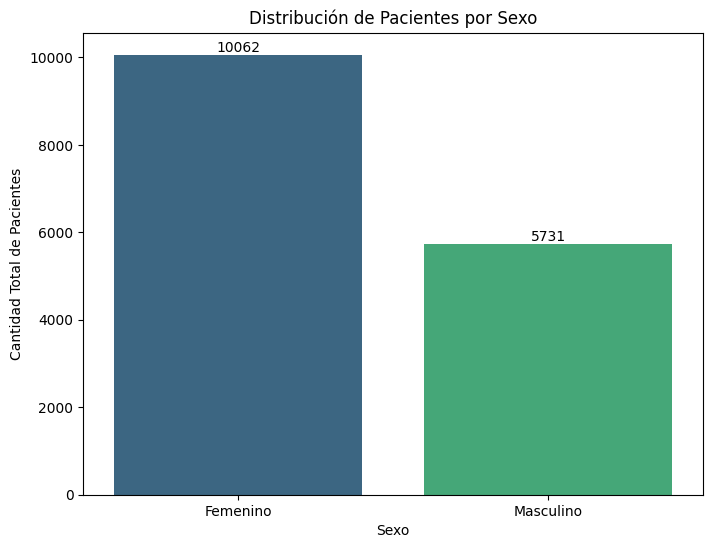

In [ ]:
#  los datos son cualitativos, es necesario traducirlos a datos cuantitativos para poder analizarlos.
#Sin embargo, considerando solo los datos de sexo, se hace incluso complicado el poder analizarlos, debido a que secciona y
#muestra los datos de manera segmentada. Por ello, para una visualización de los datos, se debe determinar cuántos pacientes hay en
#el archivo proporcionado y en base a ello ir filtrando características independientes que permitan visualizar los datos.
Total_pacientes = df_red['TOTAL_PACIENTES'].sum()

# Calculando el mumero de pacientes femeninos
total_pacientes_femeninos = df_red[df_red['SEXO'] == 'FEMENINO']['TOTAL_PACIENTES'].sum()

# Pacientes masculinos
total_pacientes_masculinos = Total_pacientes - total_pacientes_femeninos

# Se creara un dataframe en forma de grafica de barras, pues la manera mas comode de observar la incurrencia de
# personas con sexo especifico a mostrar.
data = pd.DataFrame({'Sexo': ['Femenino', 'Masculino'], 'Cantidad': [total_pacientes_femeninos, total_pacientes_masculinos]})

# ploteando las grafica
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sexo', y='Cantidad', palette='viridis')
plt.title('Distribución de Pacientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad Total de Pacientes')
for bar in plt.gca().containers:
    label = [f"{int(h.get_height())}" for h in bar]
    plt.bar_label(bar, labels=label, label_type='edge')
plt.show()

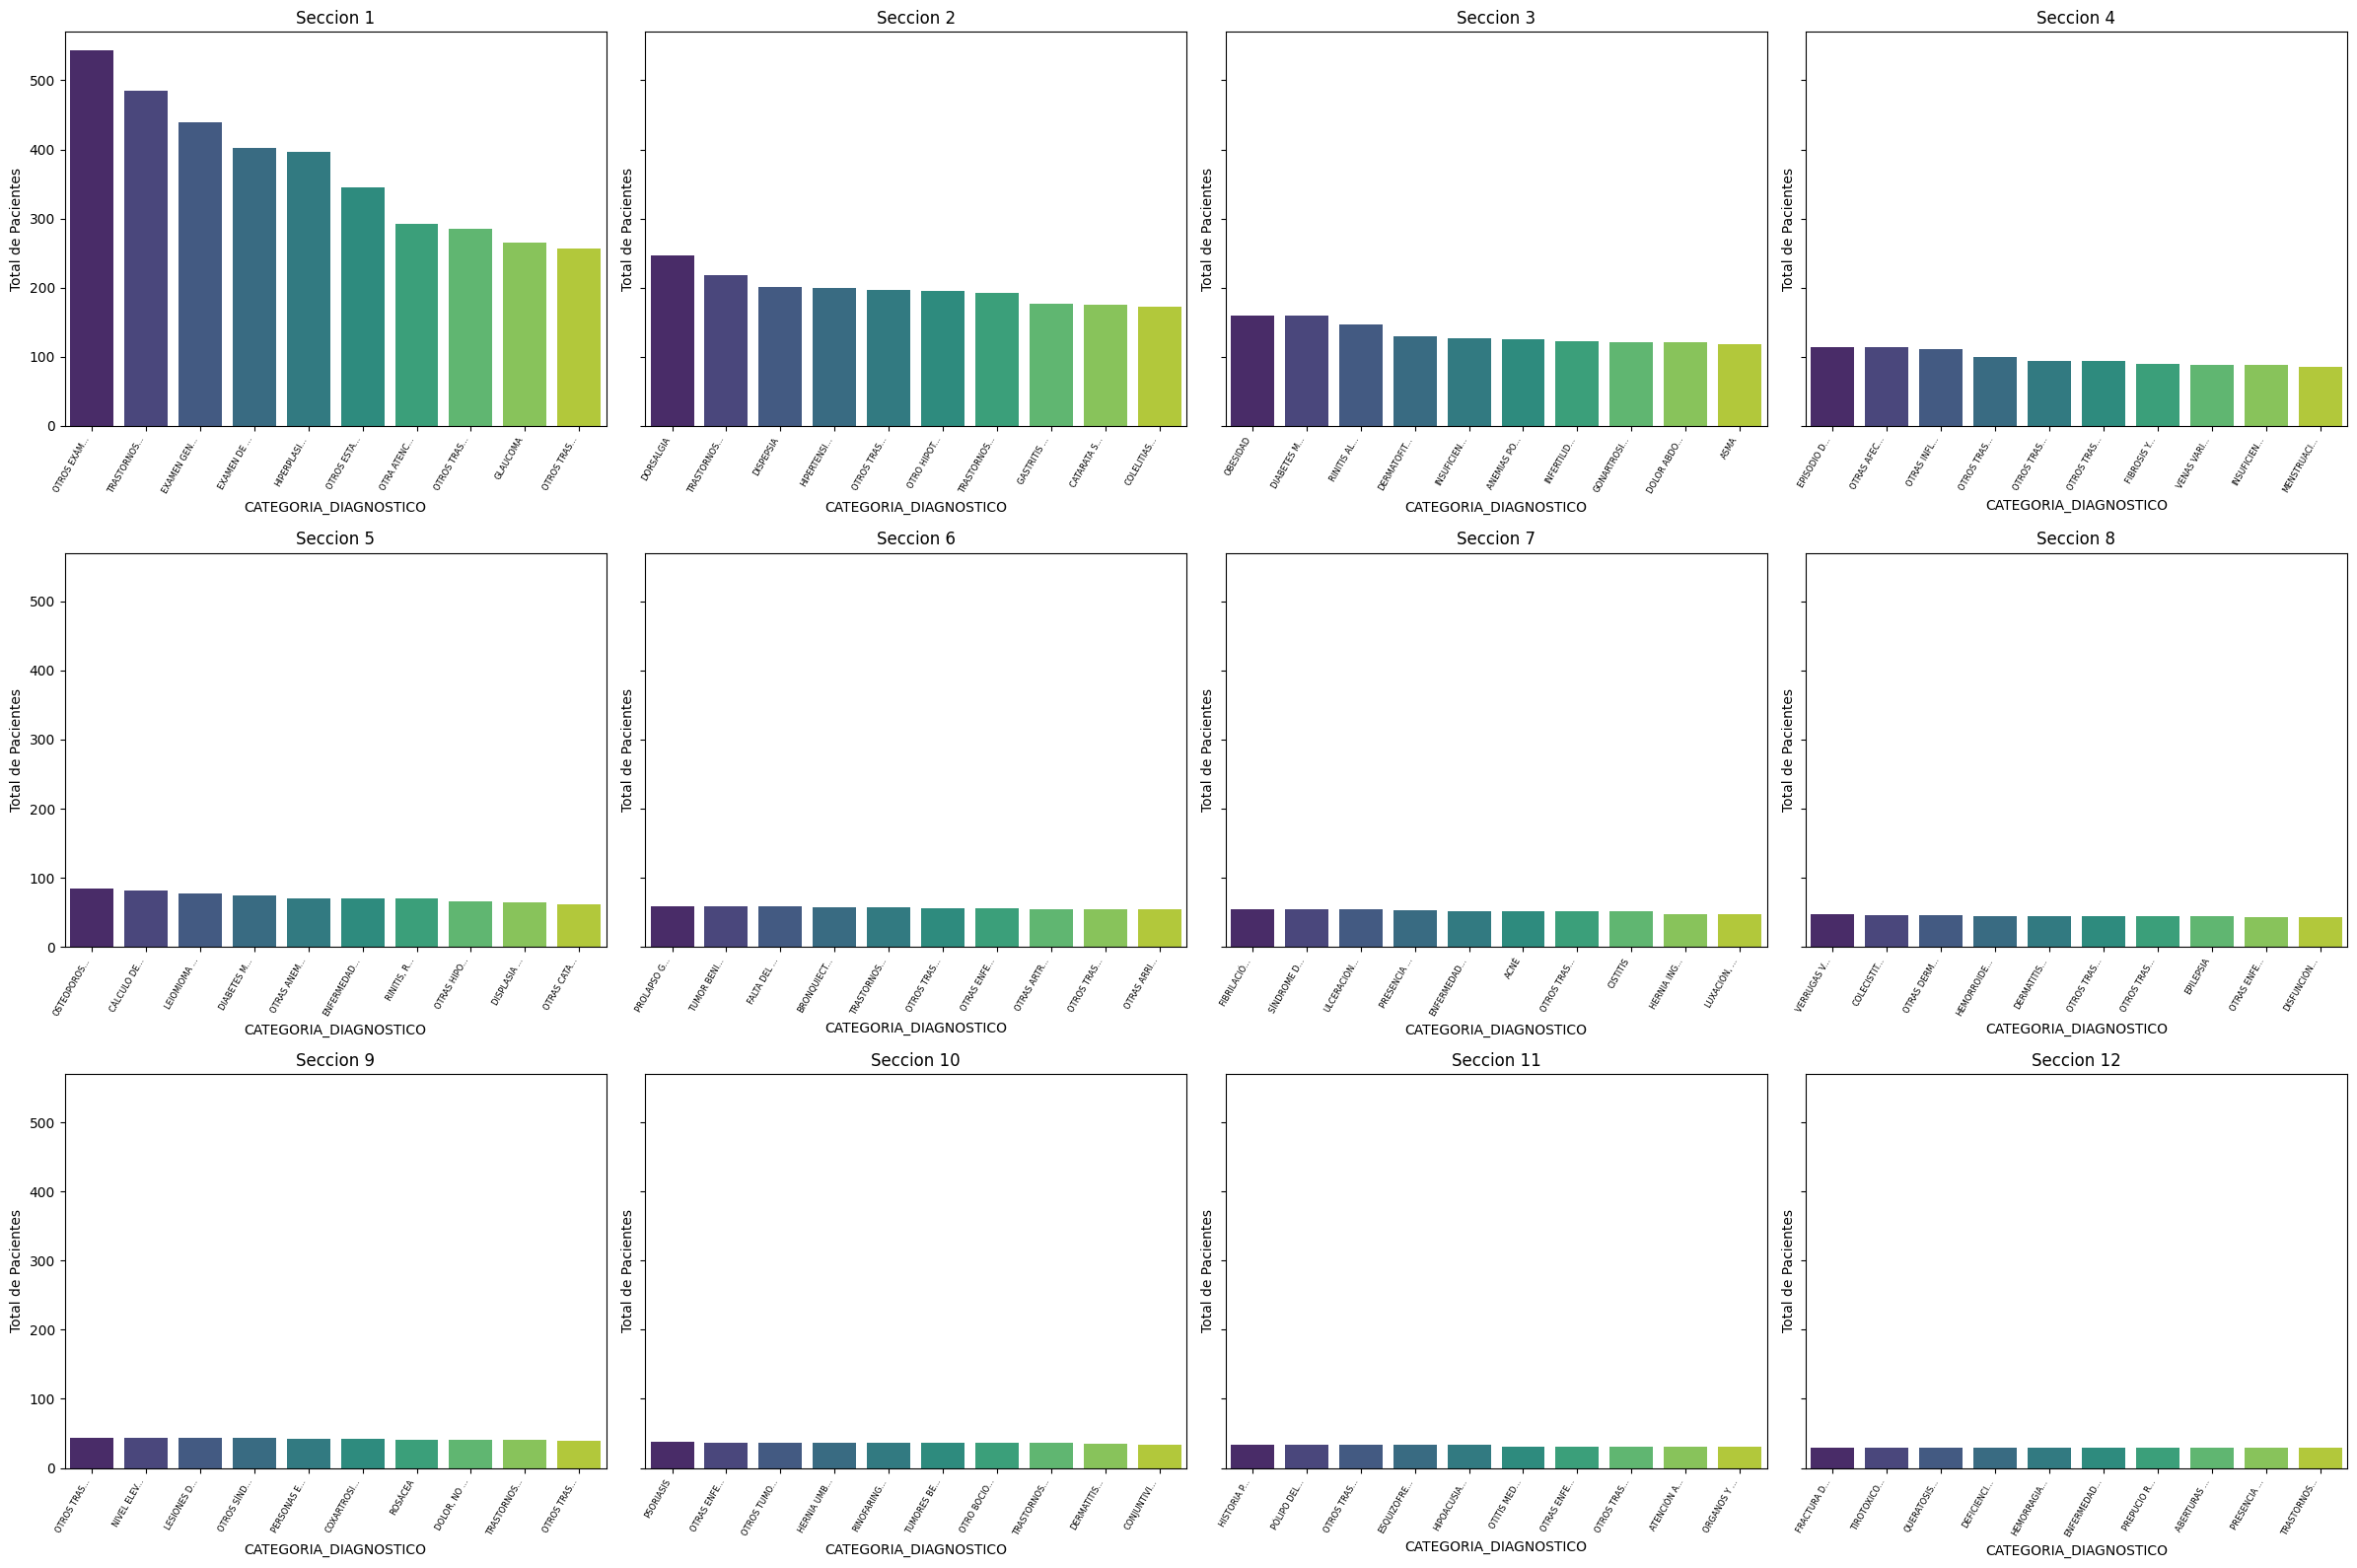

In [ ]:
# Agrupamos nuestro target sumando los valores de 'TOTAL_PACIENTES'
categoria_diagnostico_counts = df_red.groupby('CATEGORIA_DIAGNOSTICO')['TOTAL_PACIENTES'].sum().reset_index()

# Ordenando de manera descendente:
categoria_diagnostico_counts = categoria_diagnostico_counts.sort_values(by='TOTAL_PACIENTES', ascending=False)

# Creamos un plano
fig, axes = plt.subplots(3,4, figsize=(24,16), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
categorias_significativas=[]
# Iterando para el ploteo de cada dato de interes
for i, ax in enumerate(axes.flat):
    if i < len(categoria_diagnostico_counts):
        data_subset = categoria_diagnostico_counts.iloc[i * 10:(i + 1) * 10]

        # Creando un grafico de barras por cada uno.
        sns.barplot(data=data_subset, x='CATEGORIA_DIAGNOSTICO', y='TOTAL_PACIENTES', palette='viridis', ax=ax)
        ax.set_title(f'Seccion {i + 1}')
        ax.set_xlabel('CATEGORIA_DIAGNOSTICO')
        ax.set_ylabel('Total de Pacientes')

        # Dando las respectivas etiquetas.
        ax.set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_xticklabels()], rotation=60, ha='right', fontsize=6)  # Reducir el tamaño y rotar más

    else:
        # Si no hay datos para el subgráfico, se ocultan del ploteo
        ax.axis('off')

# Ajustamos la disposición
plt.tight_layout()
# Mostramos la figura
plt.show()

Al tener tantas categorías, se determina trabajar con solo las categorías que presentan al menos 200 casos

In [ ]:
#Se filtran las enfermedades
categorias_frecuentes = categoria_diagnostico_counts[categoria_diagnostico_counts['TOTAL_PACIENTES'] > 200]

# Ahora se obtiene una lista de los nombres de las enfermedades que cumplen con la condición
lista_categorias_frecuentes = categorias_frecuentes['CATEGORIA_DIAGNOSTICO'].tolist()
lista_categorias_frecuentes

['OTROS EXÁMENES ESPECIALES E INVESTIGACIONES EN PERSONAS SIN QUEJAS O SIN DIAGNÓSTICO INFORMADO',
 'TRASTORNOS DE LA ACOMODACIÓN Y DE LA REFRACCIÓN',
 'EXAMEN GENERAL E INVESTIGACIÓN DE PERSONAS SIN QUEJAS O SIN DIAGNÓSTICO INFORMADO',
 'EXAMEN DE PESQUISA ESPECIAL PARA OTRAS ENFERMEDADES Y TRASTORNOS',
 'HIPERPLASIA DE LA PRÓSTATA',
 'OTROS ESTADOS POSTQUIRÚRGICOS',
 'OTRA ATENCIÓN MÉDICA',
 'OTROS TRASTORNOS DEL SISTEMA URINARIO',
 'GLAUCOMA',
 'OTROS TRASTORNOS MENOPÁUSICOS Y PERIMENOPÁUSICOS',
 'DORSALGIA',
 'TRASTORNOS DEL METABOLISMO DE LAS LIPOPROTEÍNAS Y OTRAS LIPIDEMIAS',
 'DISPEPSIA']

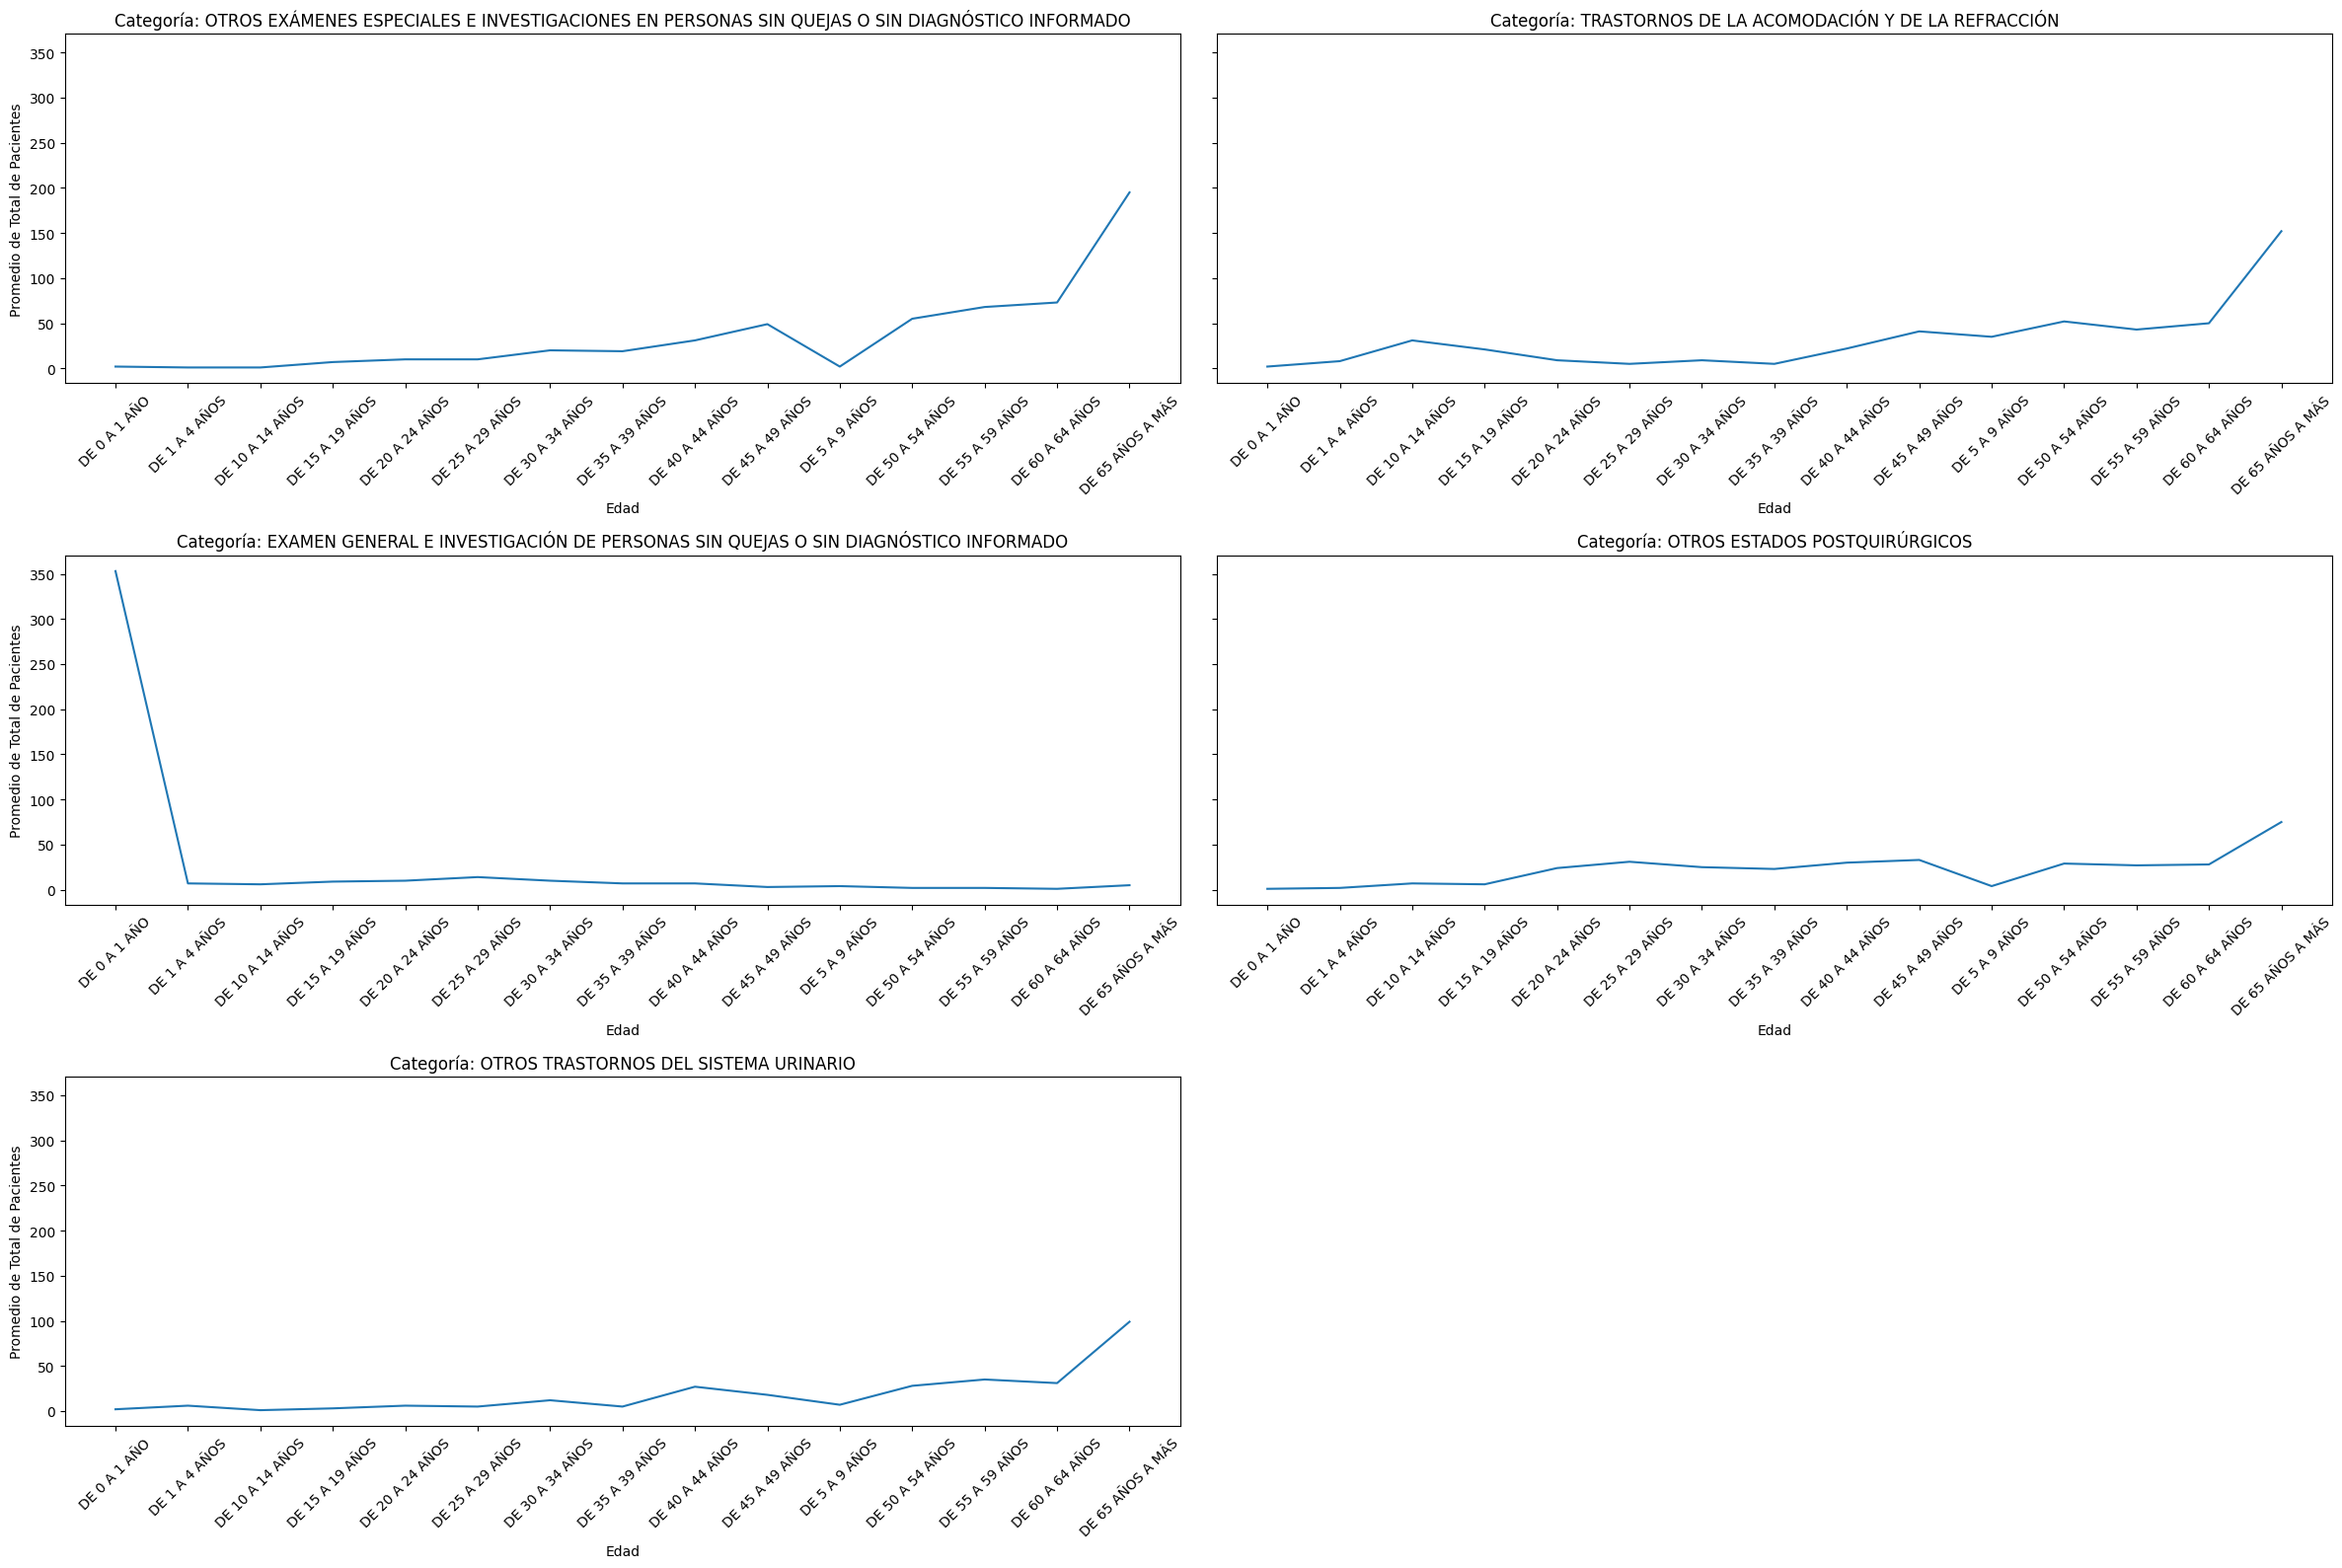

In [ ]:
# Agrupamos los grupos por edad y categoria, finalmente  calculamos el promedio de 'TOTAL_PACIENTES'
mean_total_pacientes = df_red.groupby(['GRUPOS_POR_EDAD', 'CATEGORIA_DIAGNOSTICO'])['TOTAL_PACIENTES'].sum().reset_index()

# se ha obtenido una lista de categorías que cumplen con la condición de tener todos los grupos de edad.
#Durante el desarrollo, se observaron datos donde solo existía un solo grupo de edad o eran muy pequeños y nada relevantes,
#por lo que se han omitido esos grupos para mostrar los gráficos. Para ello, se ha creado una lista de categorías que cumplen
#esta condición.
categorias_validas = []
# Recorriendo los valores por columna
for categoria in lista_categorias_frecuentes:
    #Guardamos los valores
    data_subset = mean_total_pacientes[mean_total_pacientes['CATEGORIA_DIAGNOSTICO'] == categoria]
    #Si cumple la condicion establecida se concatenara en:
    if len(data_subset['GRUPOS_POR_EDAD'].unique()) >= 15:
        categorias_validas.append(categoria)
# Calculando el numero de subplots en un espacio 5x3
num_subplots = len(categorias_validas)
num_rows = 3
num_cols = 2
num_empty_subplots = num_rows * num_cols - num_subplots

# Creamos una figura y ejes para los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Crear una lista de ejes vacíos, dado que durante el desarrollo se observo que al eliminar ciertos graficos, se observaban espacios en la figura
empty_axes = [ax for ax in axes.flat[-num_empty_subplots:]]
lista_df=[]
# Iteramos sobre los ejes y las categorías de diagnóstico para poder obtener informacion sobre cada grafico
for i, ax in enumerate(axes.flat):
    if i < num_subplots:
        #Recorremos las categorias quienes superaron nuestra condicion previa
        categoria = categorias_validas[i]
        data_subset = mean_total_pacientes[mean_total_pacientes['CATEGORIA_DIAGNOSTICO'] == categoria]
        lista_df.append(data_subset)
        # Creamos un gráfico de líneas para el subconjunto de categorías con su respectiva etiqueta
        sns.lineplot(data=data_subset, x='GRUPOS_POR_EDAD', y='TOTAL_PACIENTES', ax=ax)
        ax.set_title(f'Categoría: {categoria}')
        ax.set_xlabel('Edad')
        ax.set_ylabel('Promedio de Total de Pacientes')

        # Rotamos las etiquetas en el eje x para mejor legibilidad
        plt.setp(ax.get_xticklabels(), rotation=45)
    else:
        # Si no hay datos para el subgráfico, se ocultan y rellenamos con un gráfico vacío
        ax.axis('off')
        # Se crea un gráfico de líneas vacío
        sns.lineplot(x=[], y=[], ax=ax)

# Ajustamos la disposición de los subgráficos
plt.tight_layout()
# Mostramos la figura
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#Se codifica los rango de edades para poder hacer el modelo de regresión
for i in range(len(lista_df)):
  lista_df[i]["GRUPOS_POR_EDAD"] = encoder.fit_transform(lista_df[i]["GRUPOS_POR_EDAD"].values)

Se realiza el modelo de regresión para los casos filtrados

Métricas para el caso: OTROS EXÁMENES ESPECIALES E INVESTIGACIONES EN PERSONAS SIN QUEJAS O SIN DIAGNÓSTICO INFORMADO
Mean Squared Error (MSE): 210.9753456152849
R-squared (R²): 0.9114253595394903
Métricas para el caso: TRASTORNOS DE LA ACOMODACIÓN Y DE LA REFRACCIÓN
Mean Squared Error (MSE): 240.26944788957184
R-squared (R²): 0.8156248907774166
Métricas para el caso: EXAMEN GENERAL E INVESTIGACIÓN DE PERSONAS SIN QUEJAS O SIN DIAGNÓSTICO INFORMADO
Mean Squared Error (MSE): 1405.378039653281
R-squared (R²): 0.8124851398773731
Métricas para el caso: OTROS ESTADOS POSTQUIRÚRGICOS
Mean Squared Error (MSE): 51.15989110075797
R-squared (R²): 0.841118350618764
Métricas para el caso: OTROS TRASTORNOS DEL SISTEMA URINARIO
Mean Squared Error (MSE): 72.3060661732491
R-squared (R²): 0.8758765172123213


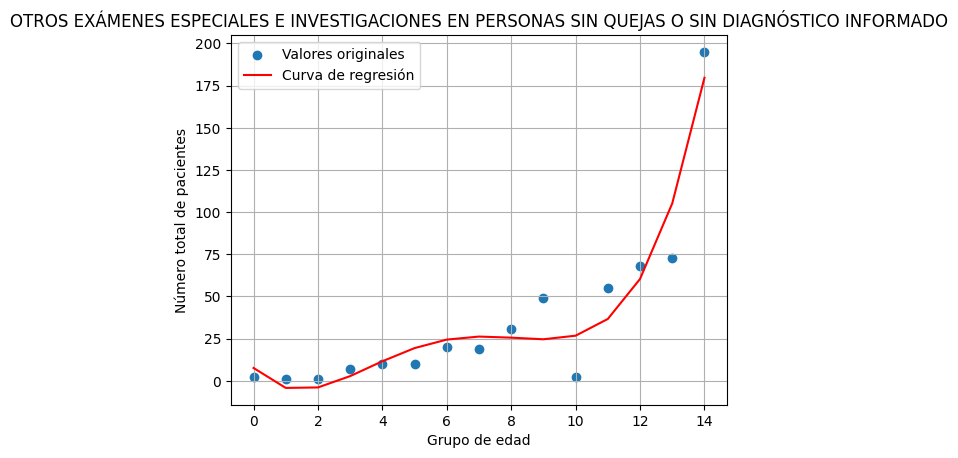

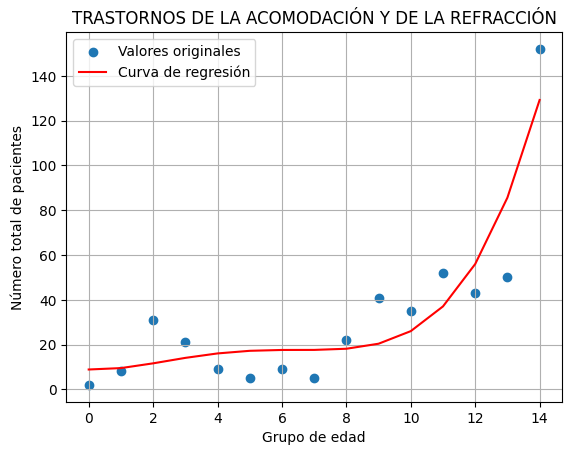

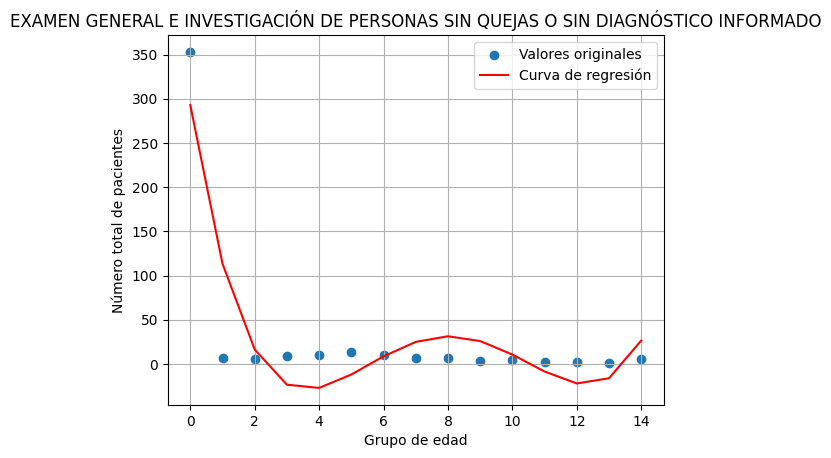

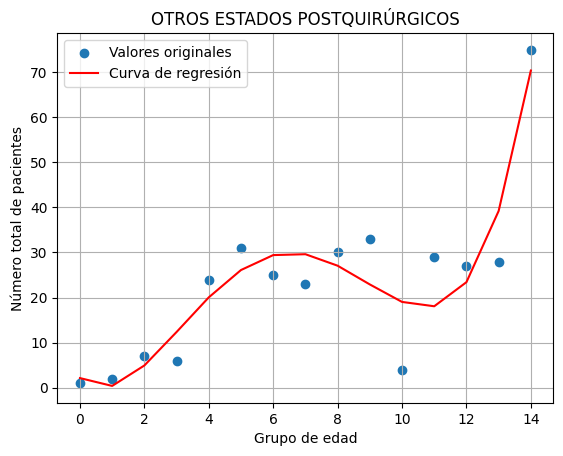

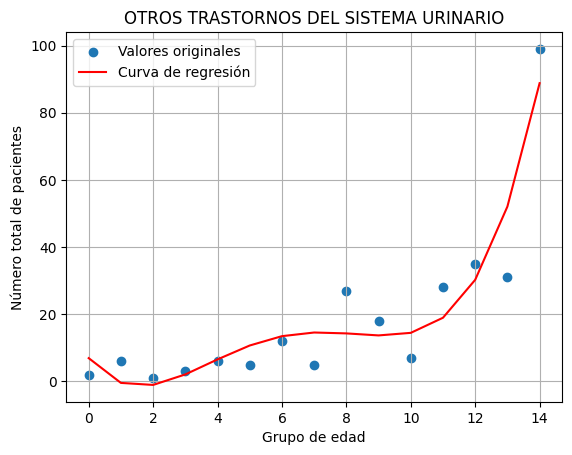

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
for i in range(len(lista_df)):
  hc_train=lista_df[i]['GRUPOS_POR_EDAD'].tolist()
  weeks_train=lista_df[i]['TOTAL_PACIENTES'].tolist()
  hc_train = np.array(hc_train)
  weeks_train = np.array(weeks_train)
  hc_train=hc_train.reshape(-1,1)
  weeks_train=weeks_train.reshape(-1,1)
  #specify degree of 3 for polynomial regression model
  #include bias=False means don't force y-intercept to equal zero
  poly = PolynomialFeatures(degree=4, include_bias=False)

  #reshape data to work properly with sklearn
  poly_features = poly.fit_transform(hc_train)

  #fit polynomial regression model
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, weeks_train)

  #display model coefficients
  #print(poly_reg_model.intercept_, poly_reg_model.coef_)

  #predict y-values using model
  y_pred = poly_reg_model.predict(poly_features)

  #plot data and model
  plt.figure()
  plt.scatter(hc_train, weeks_train)
  plt.plot(hc_train, y_pred, color='red')
  plt.xlabel('Grupo de edad')
  plt.ylabel('Número total de pacientes')
  titulo=lista_df[i]['CATEGORIA_DIAGNOSTICO'].tolist()
  plt.title(titulo[0])
  plt.grid()
  plt.legend(['Valores originales','Curva de regresión'])

  #metricas de evaluación
  mse = mean_squared_error(weeks_train, y_pred)
  r2 = r2_score(weeks_train, y_pred)

  # Imprimir las métricas
  print("Métricas para el caso:", titulo[0])
  print(f'Mean Squared Error (MSE): {mse}')
  print(f'R-squared (R²): {r2}')

**Conclusión**

1. **Lectura y Preprocesamiento de Datos**:
   - Se carga un conjunto de datos desde un archivo CSV llamado 'DIAGNOSTICOS_POR_GRUPOS_DE_EDAD.csv' utilizando pandas.
   - Se crea una copia del conjunto de datos original llamada `df_red` que contiene solo columnas específicas ('SEXO', 'GRUPOS_POR_EDAD', 'DIAGNOSTICOS_CIE', 'CATEGORIA_DIAGNOSTICO', 'TOTAL_PACIENTES').

2. **Manipulación de Datos**:
   - Se realiza una corrección en la columna 'GRUPOS_POR_EDAD', donde 'MENORES DE 1 AÑO' se reemplaza con 'DE 0 A 1 AÑO'.
   - Se elimina la columna 'DIAGNOSTICOS_CIE' del DataFrame `df_red`.

3. **Exploración de Datos**:
   - Se imprime el número de clases únicas para las columnas 'GRUPOS_POR_EDAD', 'SEXO', 'CATEGORIA_DIAGNOSTICO' y 'DIAGNOSTICOS_CIE'.
   - Se realiza un análisis sobre la naturaleza de las categorías 'DIAGNOSTICOS_CIE' y 'CATEGORIA_DIAGNOSTICO'.

4. **Visualización de Datos**:
   - Se visualiza la distribución de pacientes por sexo utilizando un gráfico de barras.
   - Se crea un conjunto de subgráficos que muestran la distribución de pacientes según la categoría de diagnóstico.
   - Se filtran las categorías que tienen más de 200 pacientes y se crea una lista de categorías frecuentes.

5. **Análisis por Edades**:
   - Se agrupan los datos por grupos de edad y categoría de diagnóstico para calcular el promedio de 'TOTAL_PACIENTES'.
   - Se filtran las categorías que tienen al menos 15 grupos de edad diferentes.

6. **Modelo de Regresión Polinómica**:
   - Para cada categoría filtrada, se realiza un modelo de regresión polinómica para predecir el número total de pacientes en función del grupo de edad.
   - Se imprime el Mean Squared Error (MSE) y el coeficiente R-squared (R²) para evaluar el rendimiento del modelo.

**Observaciones Generales**:

- Se utilizan bibliotecas como pandas, numpy, seaborn y matplotlib para manipular y visualizar los datos.
- Se aplica un enfoque de regresión polinómica para modelar la relación entre el grupo de edad y el número total de pacientes en cada categoría de diagnóstico.

#Bibliografía
Hospital Nacional Arzobispo Loayza (HNAL) (2017). Diagnósticos de Pacientes con Morbilidad por Grupos de Edad - Hospital Nacional Arzobispo Loayza - HNAL.
https://www.datosabiertos.gob.pe/dataset/diagn%C3%B3sticos-de-pacientes-con-morbilidad-por-grupos-de-edad-hospital-nacional-arzobispo